<a href="https://colab.research.google.com/github/demoleiwang/DailyCodeRepo/blob/master/Courses/IS713/01_1_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference:
- https://www.mathsisfun.com/data/confidence-interval.html
- http://onlinestatbook.com/2/index.html
- https://www.econometrics-with-r.org/



Download link of *data*: https://drive.google.com/file/d/1Y5Mm7cClpWIv5DaZ4eYjqAjvUc6-5SlJ/view?usp=sharing

In [1]:
!gdown --id '1Y5Mm7cClpWIv5DaZ4eYjqAjvUc6-5SlJ' --output Earnings_and_Height.xlsx

Downloading...
From: https://drive.google.com/uc?id=1Y5Mm7cClpWIv5DaZ4eYjqAjvUc6-5SlJ
To: /content/Earnings_and_Height.xlsx
100% 710k/710k [00:00<00:00, 45.2MB/s]


In [2]:
import pandas as pd
data = pd.read_excel("Earnings_and_Height.xlsx")

~~~
# import statsmodels.formula.api as sm
# df = pd.DataFrame({"A": [10,20,30,40,50], "B": [20, 30, 10, 40, 50], "C": [32, 234, 23, 23, 42523]})
# result = sm.ols(formula="A ~ B + C", data=df).fit()
# print(result.params)
# print(result.summary())
~~~


In [3]:
data

,sex,age,mrd,educ,cworker,region,race,earnings,height,weight,occupation
0,0,48,1,13,1,3,1,84054.750000,65,133,1
1,0,41,6,12,1,2,1,14021.394531,65,155,1
2,0,26,1,16,1,1,1,84054.750000,60,108,1
3,0,37,1,16,1,2,1,84054.750000,67,150,1
4,0,35,6,16,1,1,1,28560.386719,68,180,1
...,...,...,...,...,...,...,...,...,...,...,...
17865,1,47,6,12,1,1,1,18168.841797,70,150,15
17866,1,44,1,12,2,4,1,84054.750000,74,230,15
17867,1,30,1,12,1,3,1,16081.587891,65,162,15
17868,1,46,3,12,4,4,1,84054.750000,68,190,15


(a) median value of height

In [4]:
data.median(axis=0)['height']

67.0

------

(b) tall workers > 67, short workers <= 67
- i) averge earnings of short workers
- ii) averge earnings of tall workers
- iii) taller > shorter? how much? what is a 95% confidence value $\bar{x} +/- 1.96 \times \frac{sd}{\sqrt{n}}$

Further, for difference, iii) should be $M_1-M_2 + or - (S_{M_1-M_2})$

For , $S_{M_1-M_2} = \sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}$ 

In [5]:
data_taller = data[data['height']>67]
data_shorter = data[data['height']<=67]
print (data_taller.shape)
print (data_shorter.shape)

(7756, 11)
(10114, 11)


In [6]:
print (data_taller.earnings.mean())
print (data_shorter.earnings.mean())

49987.87583705357
44488.43593526957


In [7]:
data_taller.earnings.mean() - data_shorter.earnings.mean()

5499.439901784004

~~~
import numpy as np, statsmodels.stats.api as sms

X1, X2 = np.arange(10,21), np.arange(20,26.5,.5)

cm = sms.CompareMeans(sms.DescrStatsW(X1), sms.DescrStatsW(X2))
print cm.tconfint_diff(usevar='unequal')
~~~

Refer to: http://onlinestatbook.com/2/estimation/difference_means.html

In [8]:
mean_ts = data_taller.earnings.mean() - data_shorter.earnings.mean()
std1 = data_taller.earnings.std()
std2 = data_shorter.earnings.std()
print (mean_ts, std1, std2)
s_m1_m2 = np.sqrt(std1*std1/data_taller.shape[0] + std2*std2/data_shorter.shape[0])
print (s_m1_m2)
lower_limit = mean_ts - 1.96*s_m1_m2
upper_limit = mean_ts + 1.96*s_m1_m2
print (lower_limit, upper_limit)

5499.439901784004 26896.557391403432 26700.386973094955


NameError: ignored

In [ ]:
import numpy as np, statsmodels.stats.api as sms
x1 = data_taller['earnings'].to_numpy()
x2 = data_shorter['earnings'].to_numpy()
cm = sms.CompareMeans(sms.DescrStatsW(x1), sms.DescrStatsW(x2))
print (cm.tconfint_diff(usevar='unequal'))

---------

(c) Construct a scatter plot of earnings on heights.

Reference: https://data36.com/scatter-plot-pandas-matplotlib/

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

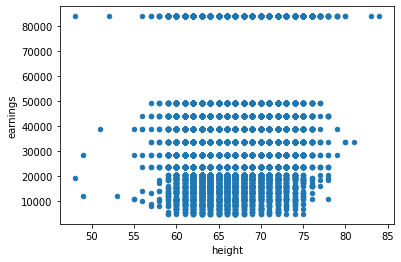

In [10]:
data.plot.scatter(x='height', y='earnings')

----

(d) Run a regression of earnings and height.

In [11]:
import statsmodels.formula.api as sm
result = sm.ols(formula="earnings ~ height", data=data).fit()
print(result.params)
print(result.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Intercept   -512.733592
height       707.671558
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               earnings   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     196.5
Date:                Mon, 14 Sep 2020   Prob (F-statistic):           2.13e-44
Time:                        10:15:49   Log-Likelihood:            -2.0755e+05
No. Observations:               17870   AIC:                         4.151e+05
Df Residuals:                   17868   BIC:                         4.151e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [12]:
y67 = 707.671558 * 67 -512.733592
y70 = 707.671558 * 70 -512.733592
y65 = 707.671558 * 65 -512.733592
print (y67, y70, y65)

46901.260794 49024.275468 45485.917678000005


- i) 
  - estimated slop: 707.6716
  - $R^2$ is 0.011
- ii)
  - Shown in last cell.



----

(e) measured in centmeters instead of inches.

In [13]:
import statsmodels.formula.api as sm
data_cm = data.copy()
data_cm['height'] = data_cm['height']*2.54
result = sm.ols(formula="earnings ~ height", data=data_cm).fit()
print(result.params)
print(result.summary())

Intercept   -512.733592
height       278.610850
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               earnings   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     196.5
Date:                Mon, 14 Sep 2020   Prob (F-statistic):           2.13e-44
Time:                        10:15:49   Log-Likelihood:            -2.0755e+05
No. Observations:               17870   AIC:                         4.151e+05
Df Residuals:                   17868   BIC:                         4.151e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [17]:
import numpy as np
np.sqrt(result.scale)

26777.23964537425

In [ ]:
data_cm.shape[0]-2

17868

In [ ]:
result.ssr / (data_cm.shape[0]-2)

717020563.0258025

The answer for question 3. How the change of measure would affect your regression result?

http://web.stanford.edu/~mrosenfe/soc_meth_proj3/soc_180B_regression_whatchanges.htm

-----

(f) female workers

In [ ]:
data.head()

,sex,age,mrd,educ,cworker,region,race,earnings,height,weight,occupation
0,0,48,1,13,1,3,1,84054.750000,65,133,1
1,0,41,6,12,1,2,1,14021.394531,65,155,1
2,0,26,1,16,1,1,1,84054.750000,60,108,1
3,0,37,1,16,1,2,1,84054.750000,67,150,1
4,0,35,6,16,1,1,1,28560.386719,68,180,1


In [ ]:
data_fm = data.copy()
data_fm = data_fm[data['sex'] == 0]
result = sm.ols(formula="earnings ~ height", data=data_fm).fit()
print(result.params)
print(result.summary())

Intercept    12650.85773
height         511.22217
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               earnings   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     26.72
Date:                Sun, 13 Sep 2020   Prob (F-statistic):           2.40e-07
Time:                        14:26:14   Log-Likelihood:            -1.1585e+05
No. Observations:                9974   AIC:                         2.317e+05
Df Residuals:                    9972   BIC:                         2.317e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

In [ ]:
data_fm.mean()[['height', 'earnings']]

height         64.492781
earnings    45620.997301
dtype: float64

In [ ]:
result.pvalues

Intercept    4.753676e-02
height       2.395572e-07
dtype: float64

In [ ]:
result.conf_int(0.05)

,0,1
Intercept,137.436439,25164.279020
height,317.365439,705.078901


In [ ]:
511.22217*65.492781+12650.85773

46132.21935215476

In [ ]:
46132.21935215476 - 45620.997301

511.2220511547566

------

(g) male

In [ ]:
data_m = data.copy()
data_m = data_m[data['sex'] == 1]
result = sm.ols(formula="earnings ~ height", data=data_m).fit()
print(result.params)
print(result.summary())

Intercept   -43130.342347
height        1306.859906
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               earnings   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     168.2
Date:                Sun, 13 Sep 2020   Prob (F-statistic):           4.47e-38
Time:                        14:47:26   Log-Likelihood:                -91674.
No. Observations:                7896   AIC:                         1.834e+05
Df Residuals:                    7894   BIC:                         1.834e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [ ]:
data_m.mean()[['height', 'earnings']]

height         70.084093
earnings    48459.749109
dtype: float64

In [ ]:
result.conf_int(0.05)

,0,1
Intercept,-56986.434122,-29274.250572
height,1109.331575,1504.388236


In [ ]:
1306.859906*71.084093 -43130.342347

49766.608749075254

In [ ]:
49766.608749075254 - 48459.749109

1306.8596400752576

--------
(h) 
$$
t = \frac{\beta_1 - \beta_2}{\sqrt{se(\beta_1)^2 + se(\beta_2)^2}}
$$

In [ ]:
beta_1 = 1306.859906
beta_2 = 511.22217
se_beta_1 = 100.766
se_beta_2 = 98.896
t = (beta_1-beta_2)/np.sqrt(np.power(se_beta_1,2)+np.power(se_beta_2,2))
print (t)

5.635285280110967


(g) we can refer to https://rpubs.com/yuanmany/286603

In [18]:
data_x = data.copy()
data.occupation.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [20]:
data_x = data[data.occupation==1]
result = sm.ols(formula="earnings ~ height", data=data_x).fit()
print(result.params)
print(result.summary())

Intercept    27565.56906
height         469.45807
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               earnings   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     9.150
Date:                Mon, 14 Sep 2020   Prob (F-statistic):            0.00252
Time:                        10:28:44   Log-Likelihood:                -22089.
No. Observations:                1906   AIC:                         4.418e+04
Df Residuals:                    1904   BIC:                         4.419e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

In [21]:
data_x = data[data.occupation==2]
result = sm.ols(formula="earnings ~ height", data=data_x).fit()
print(result.params)
print(result.summary())

Intercept    19412.913520
height         622.755176
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               earnings   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     28.20
Date:                Mon, 14 Sep 2020   Prob (F-statistic):           1.17e-07
Time:                        10:29:05   Log-Likelihood:                -36504.
No. Observations:                3158   AIC:                         7.301e+04
Df Residuals:                    3156   BIC:                         7.302e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [22]:
data_x = data[data.occupation==3]
result = sm.ols(formula="earnings ~ height", data=data_x).fit()
print(result.params)
print(result.summary())

Intercept    6374.936099
height        649.721774
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               earnings   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     9.164
Date:                Mon, 14 Sep 2020   Prob (F-statistic):            0.00254
Time:                        10:29:10   Log-Likelihood:                -10105.
No. Observations:                 875   AIC:                         2.021e+04
Df Residuals:                     873   BIC:                         2.022e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

In [23]:
data_x = data[data.occupation==4]
result = sm.ols(formula="earnings ~ height", data=data_x).fit()
print(result.params)
print(result.summary())

Intercept   -44056.470792
height        1372.384841
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               earnings   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     85.07
Date:                Mon, 14 Sep 2020   Prob (F-statistic):           7.25e-20
Time:                        10:29:20   Log-Likelihood:                -22720.
No. Observations:                1957   AIC:                         4.544e+04
Df Residuals:                    1955   BIC:                         4.545e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [28]:
data_x = data[data.occupation==4]
result = sm.ols(formula="earnings ~ height", data=data_x).fit()
print(result.params)
print(result.summary())

Intercept   -44056.470792
height        1372.384841
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               earnings   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     85.07
Date:                Mon, 14 Sep 2020   Prob (F-statistic):           7.25e-20
Time:                        10:32:02   Log-Likelihood:                -22720.
No. Observations:                1957   AIC:                         4.544e+04
Df Residuals:                    1955   BIC:                         4.545e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------